# Kidney Disease Forecasting

## SETUP LIB

In [2]:
# Importing necessary libraries
import pandas as pd # Data manipulation and analysis
import numpy as np # Numerical computations and arrays
import matplotlib.pyplot as plt # Creating visualizations

## CREATE DATAFRAME

In [3]:
df = pd.read_csv('../datasets/kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


## PREPROCESSING

### ANALIYSIS DATAFRAME

In [4]:
df = df.drop(['id', 'age'], axis=1)
df.columns = ['blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   blood_pressure           388 non-null    float64
 1   specific_gravity         353 non-null    float64
 2   albumin                  354 non-null    float64
 3   sugar                    351 non-null    float64
 4   red_blood_cells          248 non-null    object 
 5   pus_cell                 335 non-null    object 
 6   pus_cell_clumps          396 non-null    object 
 7   bacteria                 396 non-null    object 
 8   blood_glucose_random     356 non-null    float64
 9   blood_urea               381 non-null    float64
 10  serum_creatinine         383 non-null    float64
 11  sodium                   313 non-null    float64
 12  potassium                312 non-null    float64
 13  haemoglobin              348 non-null    float64
 14  packed_cell_volume       3

### HANDLING MISSING VALUE

In [6]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype=="float":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [7]:
print(f'Numerical column: \n{numerical}\n\nCategorical column: {catgcols}')

Numerical column: 
['blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin']

Categorical column: ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']


In [8]:
df['class'].value_counts()

class
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [9]:
df['class'] = df['class'].replace(['ckd\t'], 'ckd')
df['class'].value_counts()

class
ckd       250
notckd    150
Name: count, dtype: int64

In [10]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

df[dep_col].value_counts()

class
ckd       250
notckd    150
Name: count, dtype: int64

### DATAFRAME TRANSFORM

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in catgcols:
    df[col] = le.fit_transform(df[col])

df['class'] = le.fit_transform(df['class'])

In [12]:
x = df[ind_col] # Feature
y = df[dep_col] # Label

In [13]:
df.head()

,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,...,32,72,34,1,4,1,0,0,0,0
1,50.0,1.020,4.0,0.0,1,1,0,0,121.0,18.0,...,26,56,34,0,3,1,0,0,0,0
2,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,...,19,70,34,0,4,1,1,0,1,0
3,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,...,20,62,19,1,3,1,1,1,1,0
4,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,...,23,68,27,0,3,1,0,0,0,0


In [14]:
df.to_csv(f'../datasets/kidney_disease(cleaned)(classified).csv')

## DECISION TREE

### INIT MODEL

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=0)

dtc = DecisionTreeClassifier(
    ccp_alpha=0.0, class_weight=None, criterion='entropy',
    max_depth=4, max_features=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, min_samples_leaf=1,
    min_samples_split=2, min_weight_fraction_leaf=0.0,
    random_state=42, splitter='best'
)

model = dtc.fit(x_train, y_train)
dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f'Accuracy data train: {accuracy_score(y_train, dtc.predict(x_train))}')
print(f'Accuracy data test: {dtc_acc}')

Accuracy data train: 0.99375
Accuracy data test: 1.0


In [17]:
print(f'Confusion Matrix: {confusion_matrix(y_test, dtc.predict(x_test))}')
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f'Classification Report: {classification_report(y_test, dtc.predict(x_test))}')

Confusion Matrix: [[52  0]
 [ 0 28]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



### TESTING MODEL

In [18]:
new_data = (80,1.02,1,0,1,1,0,0,121,36,1.2,138,4.4,15.4,32,72,34,1,4,1,0,0,0)
input_data = np.array(new_data)
reshaped = input_data.reshape(1,-1)
predict = model.predict(reshaped)
print(predict)

if (predict[0]==0):
    print('Pasien tidak terkena batu ginjal')
else:
    print('Pasien terkena batu ginjal')

[0]
Pasien tidak terkena batu ginjal


C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## VISUALIZATION

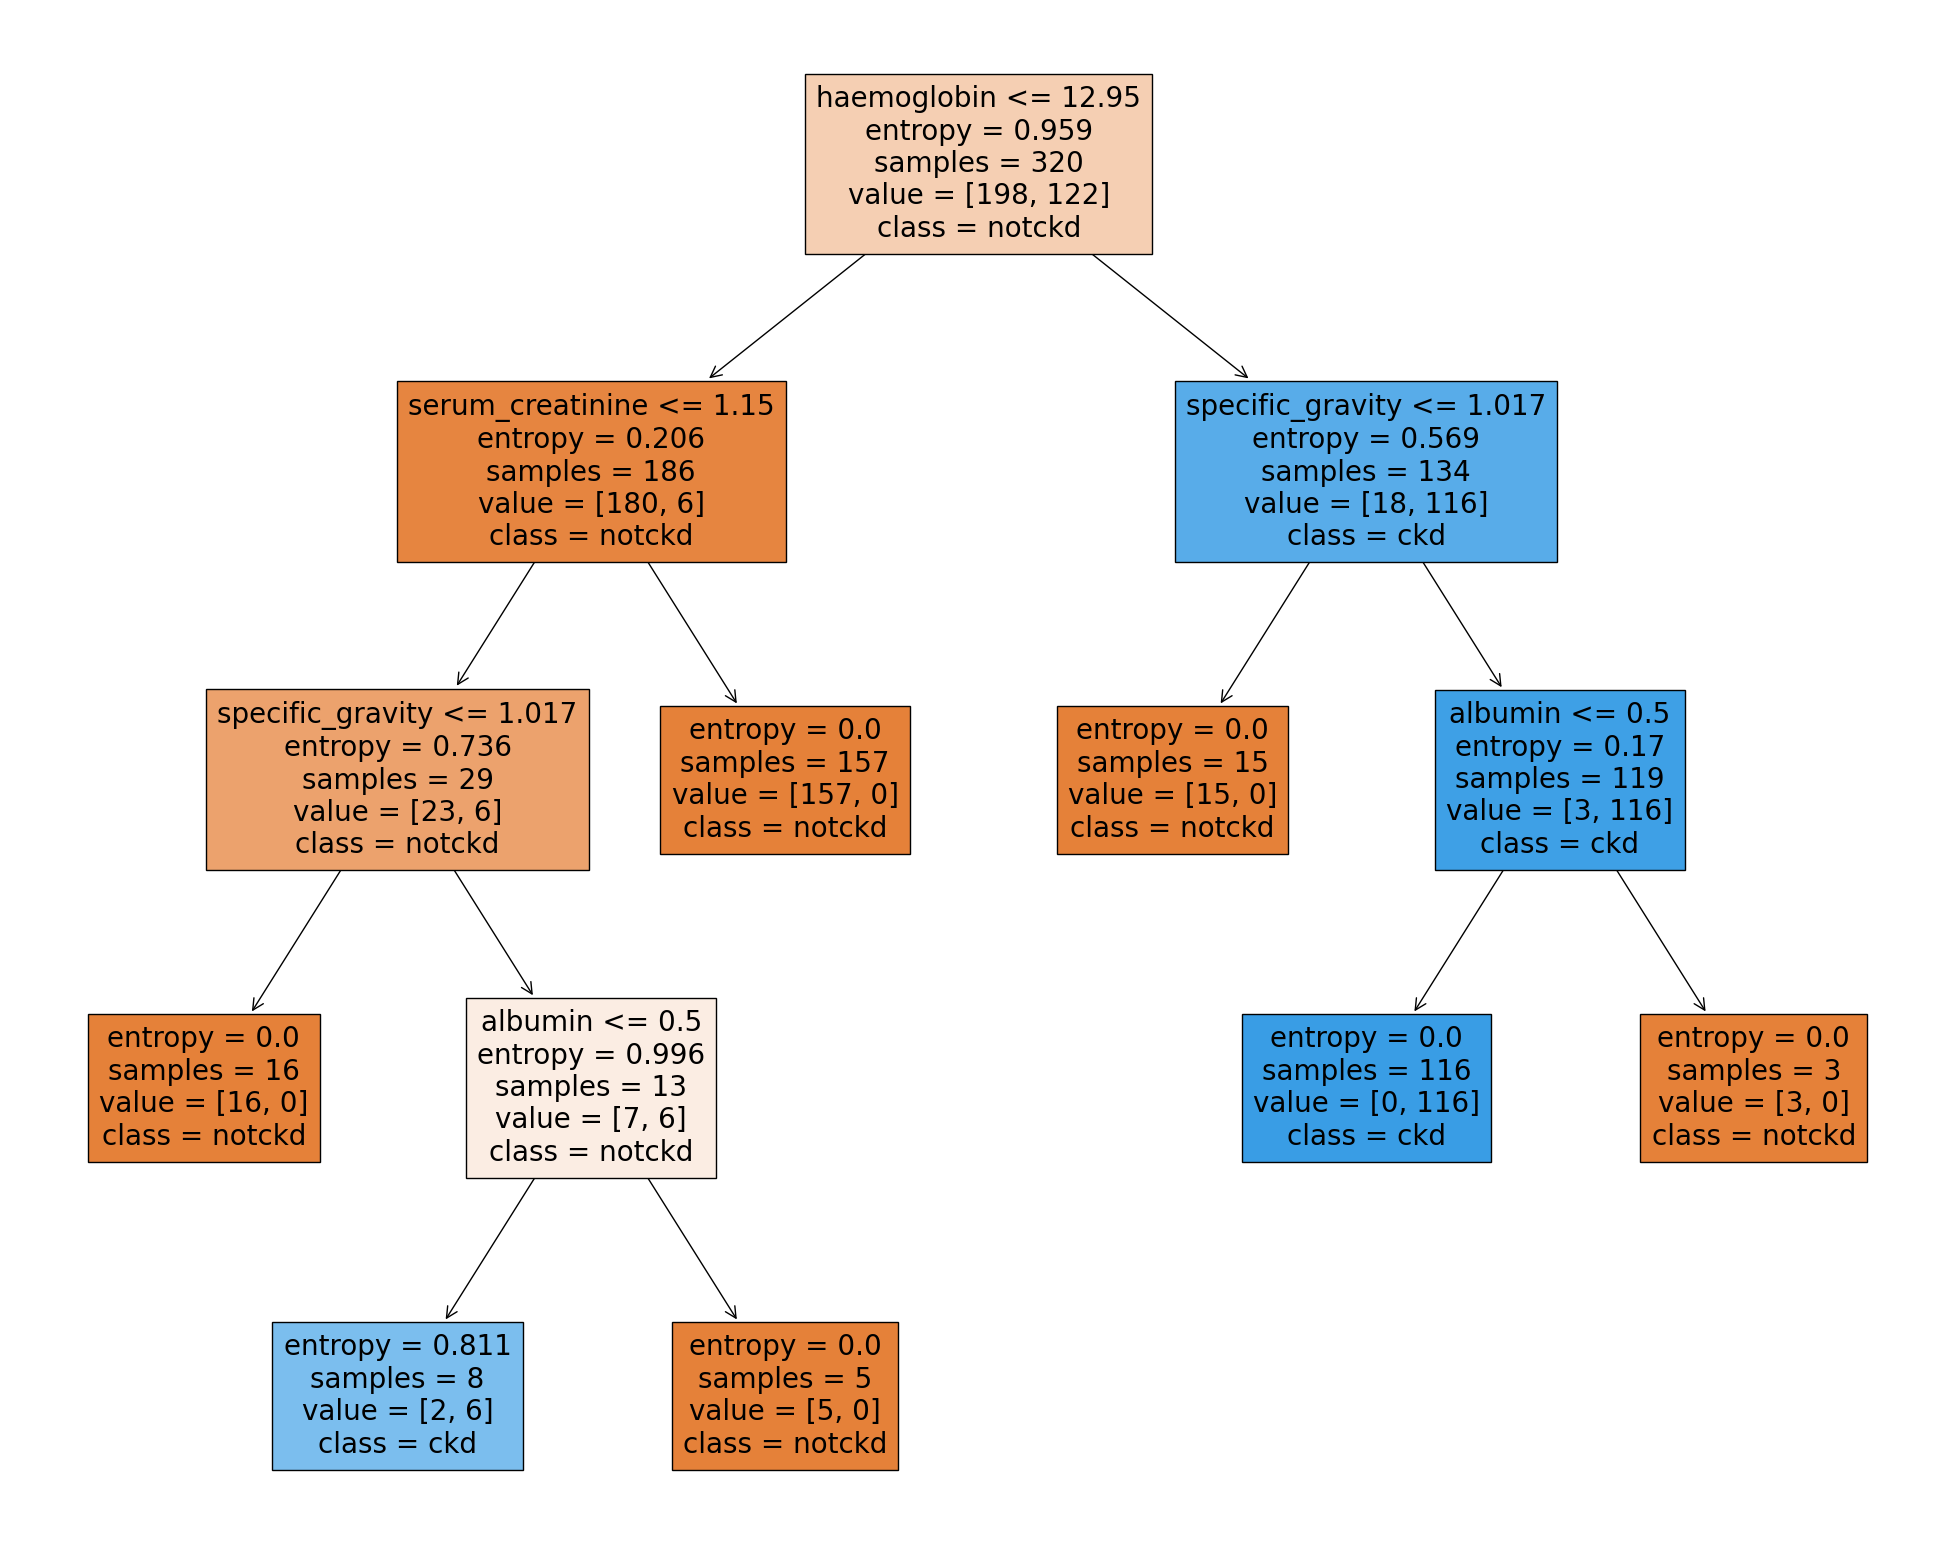

In [19]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=ind_col, class_names=['notckd','ckd'], filled=True)